CNN using finger component rotations

In [1]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from utils.parseData import GetData

In [3]:
fileNames = 'comp_rot'
path = "./data/"
labels, data = GetData(path=path, augment=False, loc=False, w_space=False)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,122.989521,5.031775,32.396511,154.947733,2.893299,48.086895,145.477856,-8.119449,46.227878,159.286507,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,135.335277,22.762292,47.132208,171.382518,45.664967,57.643169,-179.805451,40.565404,84.301659,-141.818159,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,141.891296,28.615349,54.489470,-178.385441,47.452724,69.867222,-175.951196,39.809274,87.187351,-148.173224,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,141.153613,28.042486,53.670653,-179.465062,47.739280,68.566937,-177.858053,40.358214,84.582835,-146.893964,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,123.134389,5.315064,32.581669,155.111402,2.412084,48.602000,145.787989,-9.715883,45.043492,160.383255,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,144.559904,30.531501,57.436467,-175.972231,38.421889,73.369061,-173.287146,30.167112,94.943759,-152.545570,...,91.138306,-97.140439,-3.777252,-76.862543,-87.475319,-29.036467,-69.979212,-78.152468,-38.457951,-68.814650
396,122.329051,3.709277,31.546372,154.015381,2.574144,46.867517,144.710680,-9.949672,43.072004,159.003852,...,-80.622246,-111.452963,-62.597645,-64.120419,-93.659364,-71.270047,-67.264441,62.027796,51.356863,99.237729
397,124.592251,8.038458,34.421333,156.804631,-0.996085,52.788770,147.237097,-10.483502,52.864645,161.850102,...,98.000363,-100.673949,-30.500347,-72.673170,-88.473434,-30.455098,-71.664444,67.206452,33.679707,95.859042
398,144.822964,30.707851,57.725794,-174.122997,47.373642,74.818035,-156.024064,33.054520,116.362659,-132.964345,...,91.200667,-106.541768,-51.174879,-68.090467,-90.323664,-60.710699,-70.750265,-75.846721,-59.326100,-76.396320


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2, stratify=labels)

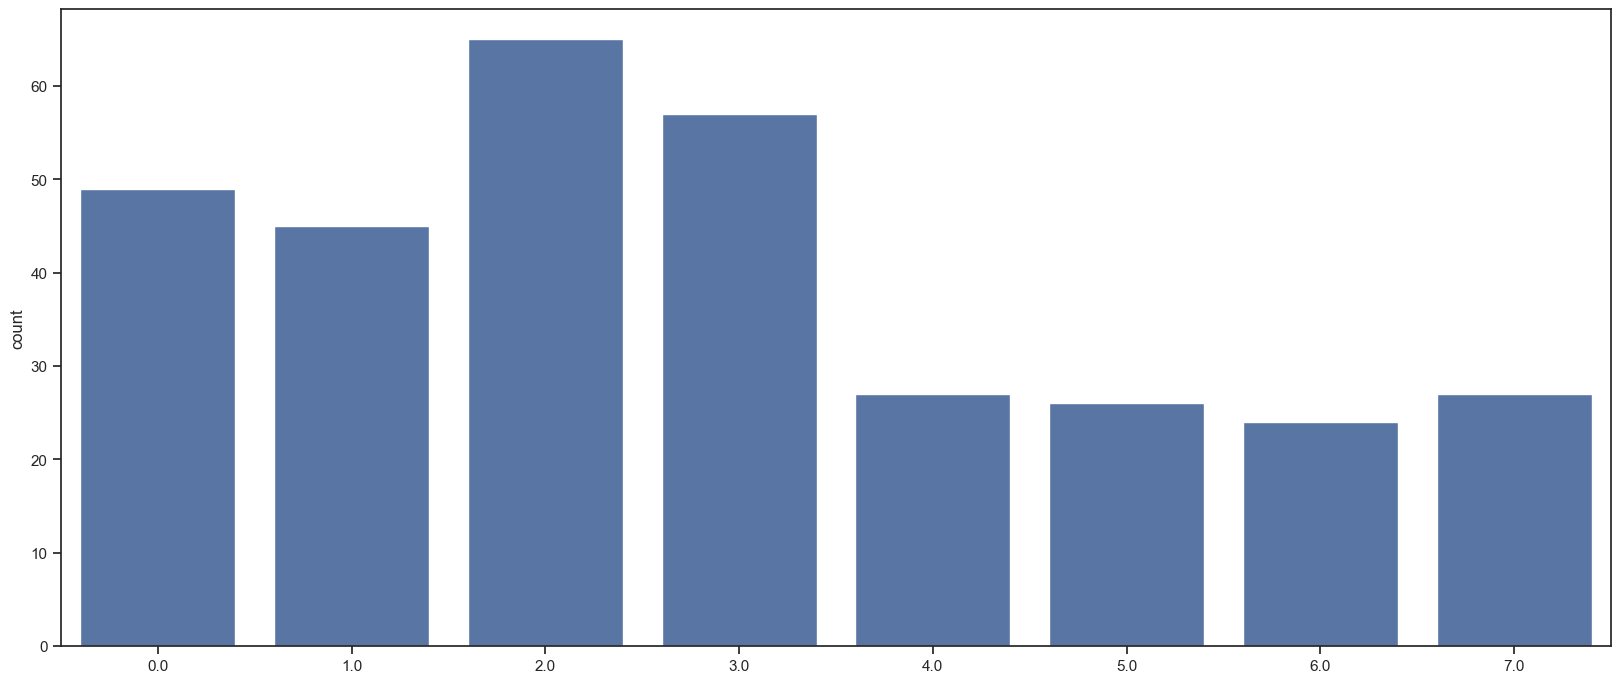

In [5]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
sns.color_palette("hls", 8)
cat = sns.countplot(x=y_train.reshape(-1))

In [6]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (320, 66)
y_train shape: (320, 1)

X_test shape: (80, 66)
y_test shape: (80, 1)


Changing labels shape to categorical: 

In [7]:
y_train[0]

array([3.])

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (320, 8)
y_test shape: (80, 8)


In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (320, 66, 1)
X_test shape: (80, 66, 1)


In [13]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory', 'horns', 'phone', 'one', 'point']
num_classes = 8

#2. Creating and training CNN

In [14]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [16]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [17]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_' + fileNames + '.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [18]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100


 1/10 [==>...........................] - ETA: 4s - loss: 29.8838 - accuracy: 0.0312 - precision: 0.0312 - recall: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.73750, saving model to ./results\model_comp_rot.h5
10/10 [==============================] - 1s 23ms/step - loss: 8.9727 - accuracy: 0.4000 - precision: 0.4241 - recall: 0.3406 - val_loss: 0.6384 - val_accuracy: 0.7375 - val_precision: 0.7971 - val_recall: 0.6875 - lr: 0.0100
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7600 - accuracy: 0.7812 - precision: 0.8571 - recall: 0.7500
Epoch 2: val_accuracy improved from 0.73750 to 0.92500, saving model to ./results\model_comp_rot.h5
10/10 [==============================] - 0s 6ms/step - loss: 0.6479 - accuracy: 0.7531 - precision: 0.8255 - recall: 0.7094 - val_loss: 0.3051 - val_accuracy: 0.9250 - val_precision: 0.9474 - val_recall: 0.9000 - lr: 0.0100
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3676 - accuracy:

d:\Repositories\python-workspaces\deep-learning-tests\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy did not improve from 0.93750
10/10 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9250 - precision: 0.9295 - recall: 0.9062 - val_loss: 0.1994 - val_accuracy: 0.9000 - val_precision: 0.8987 - val_recall: 0.8875 - lr: 0.0100
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1862 - accuracy: 0.9375 - precision: 0.9677 - recall: 0.9375
Epoch 6: val_accuracy improved from 0.93750 to 0.98750, saving model to ./results\model_comp_rot.h5
10/10 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.8844 - precision: 0.8885 - recall: 0.8719 - val_loss: 0.0928 - val_accuracy: 0.9875 - val_precision: 0.9875 - val_recall: 0.9875 - lr: 0.0100
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1939 - accuracy: 0.9688 - precision: 0.9677 - recall: 0.9375
Epoch 7: val_accuracy did not improve from 0.98750
10/10 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.934

#3. CNN evaluation

In [19]:
model.evaluate(X_test, y_test, verbose=2)

3/3 - 0s - loss: 0.0625 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 16ms/epoch - 5ms/step


[0.06246175616979599, 1.0, 1.0, 1.0]

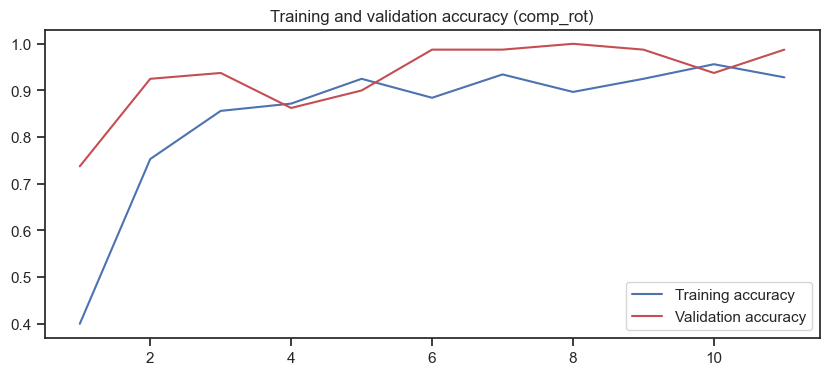

<Figure size 2000x827 with 0 Axes>

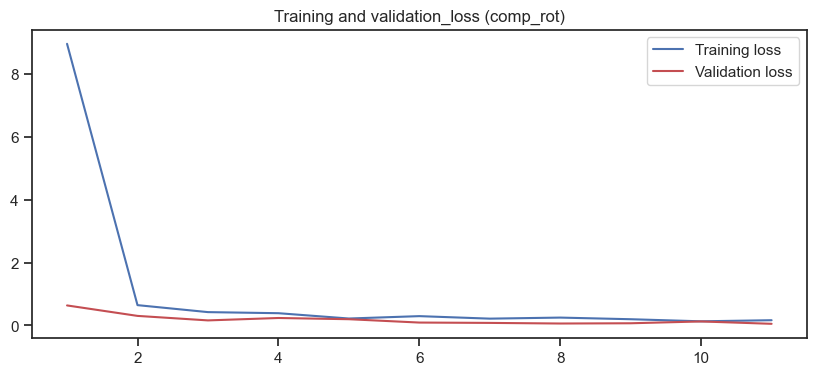

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (' + fileNames + ')')
plt.legend() 
plt.savefig('./results/acc_' + fileNames + '.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation_loss (' + fileNames + ')')
plt.savefig('./results/loss_' + fileNames + '.png',dpi=200)
plt.legend()
plt.show()

In [21]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 2ms/step


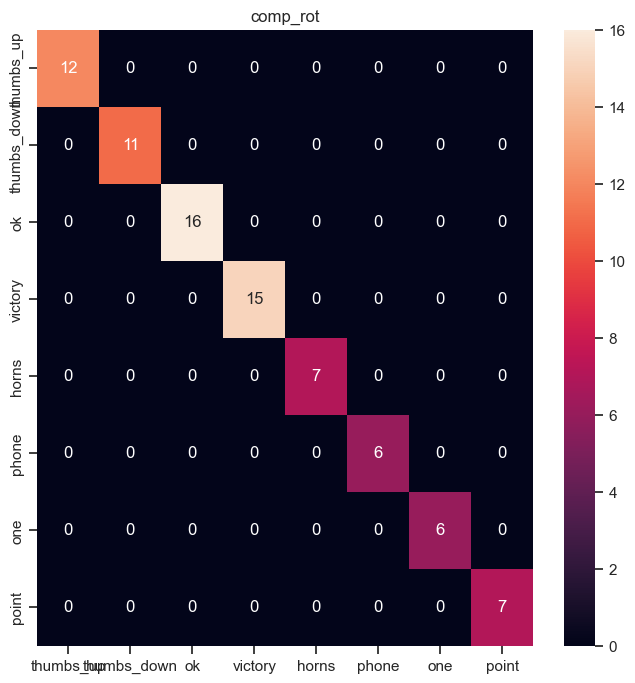

In [22]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.title(fileNames)
plt.savefig('./results/confusion_' + fileNames + '.png',dpi=200)
plt.show()

In [23]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

